# Compare models using Ecker2015 parameters
This gives a quick example showing how to compare two models during a constant current discharge followed by a rest phase, and uses the parameters defined in the file `Ecker2015_params.py`.

We begin by importing pybamm and our parameter values stored in `Ecker2015_params.py`

In [1]:
import pybamm

from Ecker2015_params import parameter_values

We then make a list of the models we want to compare. We use the DFN, SPMe, SPM and an ODE model which approximates the concentration in the particles using a polynomial.

In [2]:
models = [
    pybamm.lithium_ion.DFN(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPM(options={"particle": "quartic profile"}, name="ODE"),
]

Next we define the experiment we want to run using a simple text-based syntax.

In [3]:
experiment = pybamm.Experiment(
    [
        "Discharge at 2C until 2.5 V (5 second period)",
        "Rest for 1 hour (30 second period)",
    ],
)

We then loop of the models to solve, storing the solutions in a list. We also print the solve times.

In [4]:
sols = []
for model in models:
    sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
    sol = sim.solve()
    print(model.name, "solve time:", sol.solve_time)
    sols.append(sol)

At t = 0.00573041 and h = 3.25867e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000730595 and h = 7.33041e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000730595 and h = 2.09799e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000730595 and h = 7.1475e-19, the corrector convergence failed repeatedly or with |h| = hmin.


Doyle-Fuller-Newman model solve time: 2.982 s
Single Particle Model with electrolyte solve time: 54.614 ms
Single Particle Model solve time: 34.696 ms
ODE solve time: 28.637 ms


We can create a quick plot to see how the solutions compare

In [5]:
pybamm.dynamic_plot(sols)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.5227352650539923, step=0.01522735265053992…

Or create a custom plot showing the error between the models. We could also load in some experimental data to compare against for accuracy. 

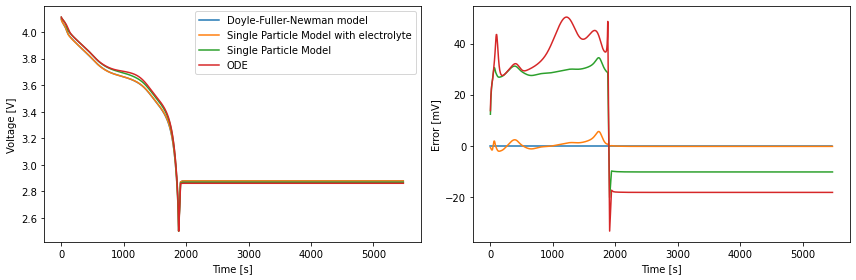

In [6]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# plot voltage for each model
for i, sol in enumerate(sols):
    ax[0].plot(sol["Time [s]"].entries, sol["Terminal voltage [V]"].entries, label=models[i].name)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Voltage [V]")
ax[0].legend()

# plot error vs DFN
t_DFN = sols[0]["Time [s]"].entries
V_DFN = sols[0]["Terminal voltage [V]"].entries
for i, sol in enumerate(sols):
    V_diff = (sol["Terminal voltage [V]"](t_DFN) - V_DFN)  # voltage difference in V
    ax[1].plot(t_DFN, V_diff * 1000) # plot in mV
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Error [mV]") 

plt.tight_layout()